In [1]:
from physionet2023.dataProcessing.datasets import PatientDataset
from scipy.signal import spectrogram
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [27]:
pds = PatientDataset()
patient_metadata, recording_metadata, recordings = pds[300]
len(recordings)

27

<AxesSubplot:>

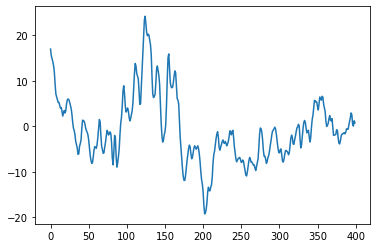

In [28]:
test_eeg = recordings[0][0,:]

subsample = test_eeg[100:500]
sns.lineplot(x=range(0, len(subsample)), y=subsample)

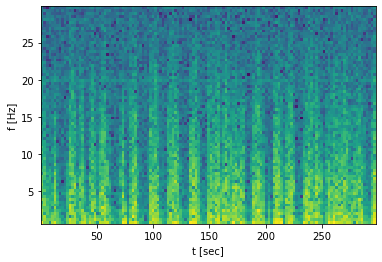

In [46]:
f, t, s = spectrogram(test_eeg, 100.)

# Trim to freq of interest (0.5 - 30 Hz)
freq_filter = np.logical_and(f > 0.5, f < 30)
s = s[freq_filter]
f = f[freq_filter]
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.pcolormesh(t, f, np.log10(s))


In [30]:
patient_metadata

{'Patient': 'ICARE_0677',
 'Age': '64',
 'Sex': 'Male',
 'ROSC': '1',
 'OHCA': 'False',
 'VFib': 'True',
 'TTM': '33',
 'Outcome': 'Poor',
 'CPC': '5',
 '': ''}

(75, 133)